In [1]:
import glob
import pandas as pd
import mne
import matplotlib.pyplot as plt
from io import StringIO
import mne
from mne.io import read_raw_eeglab, read_epochs_eeglab
import numpy as np
from scipy import signal
from scipy import fftpack
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm, tqdm_notebook
import math

from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from keras_tqdm import TQDMNotebookCallback
from tensorboard.plugins.hparams import api as hp
from livelossplot.tf_keras import PlotLossesCallback

import autosklearn.regression
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
import multiprocessing
from tpot import TPOTRegressor
from oct2py import octave

from joblib import Parallel, delayed
import multiprocessing
from joblib import wrap_non_picklable_objects
import json
import pickle
import os.path
from mpl_toolkits.mplot3d import axes3d
import timeit
from skimage.transform import resize
from timeit import default_timer as timer
from datetime import timedelta
import json

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, callbacks
from tensorflow.keras.models import Model, load_model
from tensorboard.plugins.hparams import api as hp
from tensorflow.keras.utils import plot_model

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod import bayes_mixed_glm as glm

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFECV

from spectrum import arburg, arma2psd, pburg
import pylab
from scipy.signal import find_peaks
from scipy.integrate import simps

/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.
/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/pyparsing.py:3168: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)
/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict


In [2]:
eeglab_path = '/home/raquib/Documents/MATLAB/eeglab2019_0/functions/'
octave.addpath(eeglab_path + 'guifunc')
octave.addpath(eeglab_path + 'popfunc')
octave.addpath(eeglab_path + 'adminfunc')
octave.addpath(eeglab_path + 'sigprocfunc')
octave.addpath(eeglab_path + 'miscfunc')

'.:/home/raquib/Documents/MATLAB/eeglab2019_0/functions/sigprocfunc:/home/raquib/Documents/MATLAB/eeglab2019_0/functions/adminfunc:/home/raquib/Documents/MATLAB/eeglab2019_0/functions/popfunc:/home/raquib/Documents/MATLAB/eeglab2019_0/functions/guifunc:/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/oct2py:/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/octave_kernel:/usr/lib/x86_64-linux-gnu/octave/4.2.2/site/oct/x86_64-pc-linux-gnu:/usr/lib/x86_64-linux-gnu/octave/site/oct/api-v51/x86_64-pc-linux-gnu:/usr/lib/x86_64-linux-gnu/octave/site/oct/x86_64-pc-linux-gnu:/usr/share/octave/4.2.2/site/m:/usr/share/octave/site/api-v51/m:/usr/share/octave/site/m:/usr/share/octave/site/m/startup:/usr/lib/x86_64-linux-gnu/octave/4.2.2/oct/x86_64-pc-linux-gnu:/usr/share/octave/4.2.2/m:/usr/share/octave/4.2.2/m/audio:/usr/share/octave/4.2.2/m/debian:/usr/share/octave/4.2.2/m/deprecated:/usr/share/octave/4.2.2/m/elfun:/usr/share/octave/4.2.2/m/general:/usr/share/octave/4.2

In [3]:
eegs = ['data/original/sub03/exp01/eeg/SP 110RMT r1/05-clean-prestimulus.set',
         'data/original/sub03/exp01/eeg/SP 110RMT r2/05-clean-prestimulus.set',
         'data/original/sub03/exp01/eeg/SP 110RMT r3/05-clean-prestimulus.set',
         'data/original/sub03/exp02/eeg/SP 110RMT r1/05-clean-prestimulus.set',
         'data/original/sub03/exp02/eeg/SP 110RMT r2/05-clean-prestimulus.set',
         'data/original/sub03/exp03/eeg/SP 110RMT r1/05-clean-prestimulus.set',
         'data/original/sub03/exp03/eeg/SP 110RMT r2/05-clean-prestimulus.set',
         'data/original/sub03/exp03/eeg/SP 110RMT r3/05-clean-prestimulus.set',
         'data/original/sub04/exp01/eeg/SP 110RMT r1/05-clean-prestimulus.set',
         'data/original/sub04/exp01/eeg/SP 110RMT r2/05-clean-prestimulus.set',
         'data/original/sub04/exp01/eeg/SP 110RMT r3/05-clean-prestimulus.set',
        #  'data/original/sub05/exp01/eeg/SP 110RMT r1/05-clean-prestimulus.set', # NO MEP
        #  'data/original/sub05/exp01/eeg/SP 110RMT r2/05-clean-prestimulus.set', # NO MEP
         'data/original/sub05/exp01/eeg/SP 110RMT r3/05-clean-prestimulus.set',
         'data/original/sub06/exp01/eeg/SP 110RMT r1/05-clean-prestimulus.set',
         'data/original/sub06/exp01/eeg/SP 110RMT r2/05-clean-prestimulus.set',
         'data/original/sub06/exp01/eeg/SP 110RMT r3/05-clean-prestimulus.set',
         'data/original/sub06/exp02/eeg/SP 110RMT r1/05-clean-prestimulus.set',
         'data/original/sub07/exp01/eeg/SP 110RMT r1/05-clean-prestimulus.set',
         'data/original/sub07/exp01/eeg/SP 110RMT r2/05-clean-prestimulus.set',
         'data/original/sub07/exp01/eeg/SP 110RMT r3/05-clean-prestimulus.set',
         'data/original/sub08/exp01/eeg/SP 110RMT r1/05-clean-prestimulus.set',
         'data/original/sub08/exp01/eeg/SP 110RMT r2/05-clean-prestimulus.set',
         'data/original/sub08/exp01/eeg/SP 110RMT r3/05-clean-prestimulus.set',
         'data/original/sub08/exp02/eeg/SP 110RMT r1/05-clean-prestimulus.set',
         'data/original/sub08/exp03/eeg/SP 110RMT r1/05-clean-prestimulus.set',
         'data/original/sub08/exp03/eeg/SP 110RMT r2/05-clean-prestimulus.set',
         'data/original/sub08/exp03/eeg/SP 110RMT r3/05-clean-prestimulus.set',
         'data/original/sub09/exp01/eeg/SP 110RMT r1/05-clean-prestimulus.set',
         'data/original/sub10/exp01/eeg/SP 110RMT r1/05-clean-prestimulus.set',
         'data/original/sub10/exp02/eeg/SP 110RMT r1/05-clean-prestimulus.set',
         'data/original/sub10/exp02/eeg/SP 110RMT r2/05-clean-prestimulus.set',
         'data/original/sub10/exp02/eeg/SP 110RMT r3/05-clean-prestimulus.set',
         'data/original/sub11/exp01/eeg/SP 110RMT r1/05-clean-prestimulus.set',
         'data/original/sub11/exp02/eeg/SP 110RMT r1/05-clean-prestimulus.set',
         'data/original/sub12/exp01/eeg/SP 110RMT r1/05-clean-prestimulus.set',
         'data/original/sub12/exp02/eeg/SP 110RMT r1/05-clean-prestimulus.set',
        #  'data/original/sub13/exp01/eeg/SP 110RMT r1/05-clean-prestimulus.set', # LEFT HANDED
        #  'data/original/sub14/exp01/eeg/SP 110RMT r2/05-clean-prestimulus.set', # BAD MEP
         'data/original/sub15/exp01/eeg/SP 110RMT r1/05-clean-prestimulus.set',
         'data/original/sub15/exp01/eeg/SP 110RMT r2/05-clean-prestimulus.set',
         'data/original/sub15/exp01/eeg/SP 110RMT r3/05-clean-prestimulus.set',
         'data/original/sub16/exp01/eeg/SP 110RMT r1/05-clean-prestimulus.set',
         'data/original/sub16/exp01/eeg/SP 110RMT r2/05-clean-prestimulus.set',
         'data/original/sub16/exp01/eeg/SP 110RMT r3/05-clean-prestimulus.set',
        
         'data/original/sub18/exp01/eeg/SP 110RMT r1/05-clean-prestimulus.set',
         'data/original/sub18/exp01/eeg/SP 110RMT r2/05-clean-prestimulus.set',
         'data/original/sub18/exp01/eeg/SP 110RMT r3/05-clean-prestimulus.set',
]

rejected_trials = [
    {'sub': 'sub05', 'exp': 'exp01', 'run': 'r3', 'trial': 50},
    {'sub': 'sub05', 'exp': 'exp01', 'run': 'r3', 'trial': 51},
    {'sub': 'sub05', 'exp': 'exp01', 'run': 'r3', 'trial': 52},
    {'sub': 'sub05', 'exp': 'exp01', 'run': 'r3', 'trial': 53},
    {'sub': 'sub05', 'exp': 'exp01', 'run': 'r3', 'trial': 54},
    {'sub': 'sub05', 'exp': 'exp01', 'run': 'r3', 'trial': 55},
    {'sub': 'sub05', 'exp': 'exp01', 'run': 'r3', 'trial': 56},
    {'sub': 'sub05', 'exp': 'exp01', 'run': 'r3', 'trial': 57},
    {'sub': 'sub05', 'exp': 'exp01', 'run': 'r3', 'trial': 58},
    {'sub': 'sub05', 'exp': 'exp01', 'run': 'r3', 'trial': 59},
    {'sub': 'sub05', 'exp': 'exp01', 'run': 'r3', 'trial': 60},
    {'sub': 'sub08', 'exp': 'exp03', 'run': 'r1', 'trial': 0},
    {'sub': 'sub09', 'exp': 'exp01', 'run': 'r0', 'trial': 0},
    {'sub': 'sub11', 'exp': 'exp02', 'run': 'r0', 'trial': 14},
    {'sub': 'sub11', 'exp': 'exp02', 'run': 'r0', 'trial': 38},
    {'sub': 'sub12', 'exp': 'exp01', 'run': 'r0', 'trial': 0},
    {'sub': 'sub12', 'exp': 'exp02', 'run': 'r0', 'trial': 14},
    {'sub': 'sub12', 'exp': 'exp02', 'run': 'r0', 'trial': 36},
    {'sub': 'sub12', 'exp': 'exp02', 'run': 'r0', 'trial': 44}
]

# Basic I/O and conversions.

In [4]:
def read_eeg(path):
    eeg = octave.pop_loadset(path)
    new_trial_list = []
    for i in range(eeg.data.shape[2]):
        trial = eeg.data[:, :, i]
        time = np.linspace(-1000, 1000, num=trial.shape[1])
        trial = pd.DataFrame(np.transpose(trial), columns=eeg.chanlocs.labels[0])
        trial['time'] = time
        new_trial_list.append(trial)
    return new_trial_list

def crop_trials(trial_list, duration_millis=500, sampling_rate=2048):
    new_trial_list = []
    for trial in trial_list:
        samples_to_pick = duration_millis * sampling_rate / 1000
        new_trial_list.append(trial.tail(int(samples_to_pick)))
    return new_trial_list, samples_to_pick

def crop_mep_region(mep_frame, crop_start=0.211, crop_end=0.4):
    multiplier = 7499 / 1.4998
    start = int(crop_start * multiplier)
    end = int(crop_end * multiplier)
    mep_cropped = mep_frame.iloc[start:end, :]
    time = mep_frame.iloc[start:end, :]
    return mep_cropped

def get_apb_column_name(mep_frame):
    if 'L APB' in mep_frame:
        return 'L APB'
    else:
        return 'APB'

def open_mep_as_df(path):
    fileMep = open(path, "r+")
    mep_frames = fileMep.read().split('\n\n')
    df_list = []
    for mep_frame in mep_frames:
        df_list.append(pd.read_csv(StringIO(mep_frame), '\t'))
    return df_list

def get_mep_path(eeg_path):
    segments = eeg_path.split('/')
    segments[4] = 'mep'
    segments = segments[:-1]
    mep_path = '/'.join(segments) + '/*.txt'
    mep_path = glob.glob(mep_path)[0]
    return mep_path

def calculate_mep_size(mep_frame):
    mep_cropped = crop_mep_region(mep_frame)
    apb_name = get_apb_column_name(mep_frame)
    max_row = mep_frame.iloc[mep_cropped.idxmax(axis=0)[apb_name]]
    min_row = mep_frame.iloc[mep_cropped.idxmin(axis=0)[apb_name]]
    mep_size = max_row[apb_name] - min_row[apb_name]
    return mep_size, min_row, max_row

# Read CMAP file.
def read_cmap(path):
    df = pd.read_excel(path, sheet_name='Raw data', header=None)
    columns = []
    ix = 0
    for r in df.index.values:
        if df[0][r] == 'Channel':
            ix = r
            break
    for c in df.columns.values:
        if (df[c][ix] == 2):
            columns.append(c)
    for r in df.index.values:
        if df[0][r] == 'Time (ms)':
            ix = r
            break
    df2 = df[columns].iloc[np.linspace(ix+1, df.shape[0]-2, df.shape[0]-ix-2)]
    df2['time'] = df[0].iloc[np.linspace(ix+1, df.shape[0]-2, df.shape[0]-ix-2)]
    return df2

# Identify CMAP peaks.
def find_cmap_peaks(df):
    df2 = df[(df['time'] > 105) * (df['time'] < 120)]
    time = df2['time']
    mean_clean = np.mean(df2.drop('time', axis=1), axis=1)
    return mean_clean.max(), mean_clean.min()

def get_cmap_path(eeg_path):
    segments = eeg_path.split('/')
    segments[4] = 'cmap'
    del segments[5]
    segments = segments[:-1]
    cmap_path = '/'.join(segments) + '/*.xlsx'
    cmap_paths = glob.glob(cmap_path)
    if (len(cmap_paths) == 0):
        print('No CMAP found for ' + cmap_path)
        return ''
    return cmap_paths[0]

def get_mep_category_absolute_binary(mep_size):
    if mep_size <= .5:
        return 0
    else:
        return 1
    
def calculate_mep_categories_binary(mep_sizes):
    p1 = np.percentile(mep_sizes, 50)
    cat = np.ones(len(mep_sizes)) * (mep_sizes >= p1)
    return cat

def calculate_mep_categories_cmap_binary(mep_sizes, cmap):
    sizes = []
    for mep_size in mep_sizes:
        sizes.append(mep_size / cmap)
    p1 = np.percentile(sizes, 50)
    cat = np.ones(len(mep_sizes)) * (sizes >= p1)
    return cat

def hjorth_transform(trial):
#     times = trial['time'].values
#     potential = trial[(trial['time'] > -0.5) & (trial['time'] < -0.2)]
#     hjorth = potential['C3'].values[0] - potential['FC1'].values[0] + potential['C3'].values[0] - potential['CP1'].values[0] + potential['C3'].values[0] - potential['FC5'].values[0] + potential['C3'].values[0] - potential['CP5'].values[0]
#     trial = trial + hjorth
#     trial['time'] = times
    # trial['ALL'] = trial.drop('time', axis=1).mean(axis=1).values
#     trial['LTM1'] = trial[['FC5','FC1','C3','CP5','CP1','FC3','C5','C1','CP3']].mean(axis=1).values
#     trial['RTM1'] = trial[['FC6','FC2','C4','CP6','CP2','FC4','C6','C2','CP4']].mean(axis=1).values
#     trial['LTDLPFC'] = trial[['Fp1','AF3','AF7','F1','F3','F5','F7','FC1','FC3', 'FC5']].mean(axis=1).values
#     trial['RTDLPFC'] = trial[['Fp2','AF4','AF8','F2','F4','F6','F8','FC2','FC4', 'FC6']].mean(axis=1).values
#     trial['CNTRL'] = trial[['Fz','FCz','Cz','F1','FC1','C1','C2','FC2','F2']].mean(axis=1).values
#     trial['LTOCC'] = trial[['PO7', 'PO5', 'PO3', 'O1']].mean(axis=1).values
#     trial['RTOCC'] = trial[['PO4', 'PO6', 'PO8', 'O2']].mean(axis=1).values
#     trial['OCC'] = trial[['PO7', 'PO5', 'PO3', 'POz', 'PO4', 'PO6', 'PO8', 'O1', 'Oz', 'O2']].mean(axis=1).values
#     trial['LTPAR'] = trial[['P1', 'P3', 'CP1', 'CP3']].mean(axis=1).values
#     trial['RTPAR'] = trial[['P2', 'P4', 'CP2', 'CP4']].mean(axis=1).values
#     trial['PAR'] = trial[['P1', 'P3', 'CP1', 'CP3', 'P2', 'P4', 'CP2', 'CP4']].mean(axis=1).values

    ch = trial[['FC5','FC1','C3','CP5','CP1','FC3','C5','C1','CP3']].values
    trial['LTM1'] = np.mean(ch, axis=1)
    ch = trial[['FC6','FC2','C4','CP6','CP2','FC4','C6','C2','CP4']].values
    trial['RTM1'] = np.mean(ch, axis=1)
    ch = trial[['Fp1','AF3','AF7','F1','F3','F5','F7','FC1','FC3', 'FC5']].values
    trial['LTDLPFC'] = np.mean(ch, axis=1)
    ch = trial[['Fp2','AF4','AF8','F2','F4','F6','F8','FC2','FC4', 'FC6']].values
    trial['RTDLPFC'] = np.mean(ch, axis=1)
    ch = trial[['Fz','FCz','Cz','F1','FC1','C1','C2','FC2','F2']].values
    trial['CNTRL'] = np.mean(ch, axis=1)
    ch = trial[['PO7', 'PO5', 'PO3', 'O1']].values
    trial['LTOCC'] = np.mean(ch, axis=1)
    ch = trial[['PO4', 'PO6', 'PO8', 'O2']].values
    trial['RTOCC'] = np.mean(ch, axis=1)
    ch = trial[['PO7', 'PO5', 'PO3', 'POz', 'PO4', 'PO6', 'PO8', 'O1', 'Oz', 'O2']].values
    trial['OCC'] = np.mean(ch, axis=1)
    ch = trial[['P1', 'P3', 'CP1', 'CP3']].values
    trial['LTPAR'] = np.mean(ch, axis=1)
    ch = trial[['P2', 'P4', 'CP2', 'CP4']].values
    trial['RTPAR'] = np.mean(ch, axis=1)
    ch = trial[['P1', 'P3', 'CP1', 'CP3', 'P2', 'P4', 'CP2', 'CP4']].values
    trial['PAR'] = np.mean(ch, axis=1)
    return trial

# MEP latency and duration

In [5]:
def calculate_mep_latency_duration(mep_frame, plot=False, title=None):    
    
    # Calculate prestimulus mean amplitude and std.
    std_limit = 5
    peak_lookup_start_time = .215
    apb_name = get_apb_column_name(mep_frame)
    cropped = crop_mep_region(mep_frame, crop_start=0, crop_end=0.198)[apb_name]
    mean_amp = np.mean(cropped.values)
    std = np.std(cropped)
    
    # Find the index of the first point where amp > 5 SD of mean prestimulus
    df_peak = mep_frame[mep_frame['s'] > peak_lookup_start_time]
    peak_time = 0
    for idx, row in df_peak.iterrows():
        if (row[apb_name] > std_limit * std + mean_amp or row[apb_name] < mean_amp - std_limit * std):
            peak_time = row['s']
            break

    latency_absolute = mep_frame[mep_frame['s'] == peak_time]['s'].values[0]
    latency = (latency_absolute - 0.2)
    
    # Calculate the MEP duration.
    std_limit = 6
    sample_count = mep_frame[mep_frame['s'] < 0.03].shape[0]
    df_mean = crop_mep_region(mep_frame, crop_start=0.26, crop_end=0.3)[apb_name]
    mean_amp = np.mean(df_mean.values)
    std = np.std(df_mean.values)
    consecutive_baseline_count = 0
    return_to_baseline_time = 0
    cropped = crop_mep_region(mep_frame, crop_start=latency_absolute, crop_end=0.3)
    for idx, row in cropped.iterrows():
        if (row[apb_name] < mean_amp + std_limit * std) and (row[apb_name] > mean_amp - std_limit * std):
            if consecutive_baseline_count == 0:
                return_to_baseline_time = row['s']
            consecutive_baseline_count += 1
        else:
            consecutive_baseline_count = 0
        if consecutive_baseline_count > sample_count:
            break
    
    if plot == True:
        plt.figure(figsize=(20,5))
        plt.plot(mep_frame.iloc[0:2000]['s'], mep_frame.iloc[0:2000][apb_name])
        plt.axvspan(latency_absolute, return_to_baseline_time, color='r', alpha=0.15)
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude (mV)')
        if title != None:
            plt.title(title)
    return latency, return_to_baseline_time


# Inspect latencies.
# for eeg_path in eegs:
#     mep_list = open_mep_as_df(get_mep_path(eeg_path))
#     i = 0
#     for mep_frame in mep_list:
#         calculate_mep_latency(mep_frame, plot=True, title=eeg_path + ' - ' + str(i))
#         i = i+1
#         if i == 2:
#             break

# Power and phase calculations

In [6]:
def blackman_harris_filter(channel, time, cutoffs, fs):
    numtaps = 51
    b = signal.firwin(numtaps, cutoffs, window='blackmanharris', fs=fs)
    filtered = signal.lfilter(b, 1, channel)
    delay = 0.5 * (numtaps - 1) / fs
    df = pd.DataFrame({
        'time': time-delay,
        'channel': filtered
    })
    return df

def get_phase(channel, time, band, fs=4096, plot=False):
    df_filtered = blackman_harris_filter(channel, time, [0.00001, band[0]], fs)
    df_filtered = blackman_harris_filter(df_filtered['channel'].values, df_filtered['time'].values, [band[1], fs/2-1], fs)    
    hilb = signal.hilbert(df_filtered[(df_filtered['time'] > -750) * (df_filtered['time'] < -1)]['channel'])
    phase = np.angle(hilb, deg=True)
    df_phase = pd.DataFrame(phase, columns=['phase'])
    df_phase['time'] = df_filtered[(df_filtered['time'] > -750) * (df_filtered['time'] < -1)]['time'].values
    
    if plot == True:
        plt.figure()
        plt.plot(df_phase['time'], df_phase['phase'])
        plt.plot(df_phase.iloc[-1]['time'], df_phase.iloc[-1]['phase'], 'o')
        plt.show()
    # df_phase = df_phase[df_phase['time'] <= -20]
    return df_phase.iloc[-1]['phase'] + 180

def get_power(channel, time, band, crop_start_millis=-150, fs=500, plot=False):
    # Crop.
    channel = channel[(time > crop_start_millis) * (time < -1)].values
    time = time[(time > crop_start_millis) * (time < -1)].values

    # Resample.
    ts = time[1] - time[0]
    secs = len(channel) * ts
    secs = secs/1000
    resampled = signal.resample(channel, int(secs*fs))
    resampled_time = np.linspace(time[0], time[-1], len(resampled))
    
    # PSD.
    try:
        
        # Welch method
        freq, power = signal.welch(resampled * 10, fs, nperseg=fs/2, nfft=2000)
        freq_res = freq[1] - freq[0]
        idx_band = np.logical_and(freq >= band[0], freq <= band[1])
        mean_power = simps(power[idx_band], dx=freq_res)
        df_power = pd.DataFrame({'freq': freq, 'power': power})

#         power = np.log(np.abs(power))
        
#         # FFT method
#         power = np.log(np.abs(np.fft.fft(resampled, n=500)))
#         freq = np.linspace(0, fs, len(power))
        
#         # Burgs method
#         p = pburg(resampled, 26, sampling=fs, NFFT=4096)
#         power = np.log(p.psd)
#         freq = np.linspace(0, fs, len(power))
#         power = power / (1/freq)
        
        
#         df_power = pd.DataFrame({'freq': freq, 'power': power})
#         df_power = df_power[df_power['freq'] < fs/2]
#         df_power_in_band = df_power[(df_power['freq'] >= band[0]) * (df_power['freq'] <= band[1])]
#         mean_power = np.mean(df_power_in_band['power'])
#         print(df_power.shape)
    except:
        return 0

    if plot == True:
        plt.figure()
        plt.plot(df_power['freq'], df_power['power'])
        plt.axvspan(band[0], band[1], color='r', alpha=0.2)
        plt.axhline(mean_power, color='r')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('dB Power')

    return mean_power

In [7]:
eegs[-2]

'data/original/sub18/exp01/eeg/SP 110RMT r2/05-clean-prestimulus.set'

pop_loadset(): loading file data/original/sub05/exp01/eeg/SP 110RMT r1/raw.set ...
Reading float file 'data/original/sub05/exp01/eeg/SP 110RMT r1/raw.fdt'...


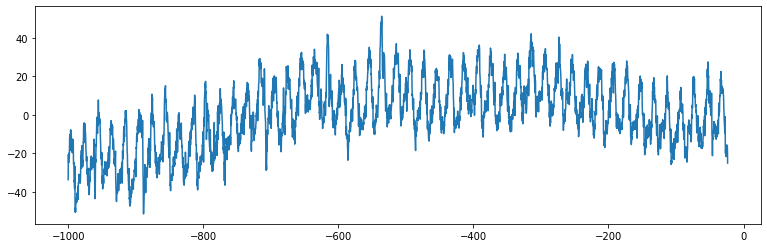

In [38]:
trials = read_eeg('data/original/sub05/exp01/eeg/SP 110RMT r1/raw.set')
trial = trials[30]
plt.figure(figsize=(13,4))
plt.plot(trial['time'].iloc[0:4000], trial['C3'].iloc[0:4000])

pop_loadset(): loading file data/original/sub05/exp01/eeg/SP 110RMT r1/06-csd-raw.set ...
Reading float file 'data/original/sub05/exp01/eeg/SP 110RMT r1/06-csd-raw.fdt'...


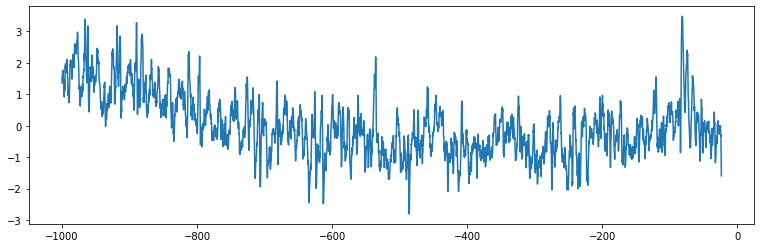

In [39]:
trials = read_eeg('data/original/sub05/exp01/eeg/SP 110RMT r1/06-csd-raw.set')
trial = trials[30]
plt.figure(figsize=(13,4))
plt.plot(trial['time'].iloc[0:4000], trial['C3'].iloc[0:4000])

pop_loadset(): loading file data/original/sub08/exp02/eeg/SP 110RMT r1/05-clean-prestimulus.set ...
Reading float file 'data/original/sub08/exp02/eeg/SP 110RMT r1/05-clean-prestimulus.fdt'...


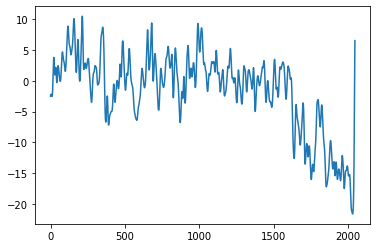

In [7]:
trials = read_eeg(eegs[22])
trial = trials[4]
plt.plot(trial['C3'])

/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 250 is greater than input length  = 74, using nperseg = 74
  .format(nperseg, input_length))


11.129242347759547

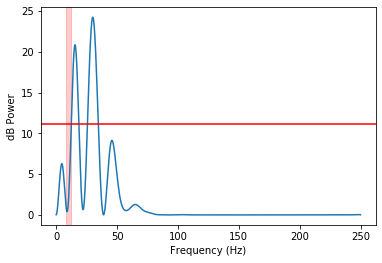

In [8]:
get_power(trial['C3'], trial['time'], [8, 12], crop_start_millis=-150, plot=True)

# Convert eeg files to pickle files

In [12]:
eegs[-3:]

['data/original/sub18/exp01/eeg/SP 110RMT r1/05-clean-prestimulus.set',
 'data/original/sub18/exp01/eeg/SP 110RMT r2/05-clean-prestimulus.set',
 'data/original/sub18/exp01/eeg/SP 110RMT r3/05-clean-prestimulus.set']

In [14]:
# # # Convert set files to pickle files.
# for eeg_path in tqdm_notebook(eegs[-3:]):
#     print(eeg_path)
#     path = os.path.dirname(eeg_path)
# #     files = glob.glob(path + '/raw.set')
# #     if len(files) == 0:
# #         continue
#     trials = read_eeg(eeg_path)
#     pickle.dump(trials, open(path + "/05-clean-prestimulus.p", "wb"))

data/original/sub18/exp01/eeg/SP 110RMT r1/05-clean-prestimulus.set
pop_loadset(): loading file data/original/sub18/exp01/eeg/SP 110RMT r1/05-clean-prestimulus.set ...
Reading float file 'data/original/sub18/exp01/eeg/SP 110RMT r1/05-clean-prestimulus.fdt'...
Scaling components to RMS microvolt
data/original/sub18/exp01/eeg/SP 110RMT r2/05-clean-prestimulus.set
pop_loadset(): loading file data/original/sub18/exp01/eeg/SP 110RMT r2/05-clean-prestimulus.set ...
Reading float file 'data/original/sub18/exp01/eeg/SP 110RMT r2/05-clean-prestimulus.fdt'...
Scaling components to RMS microvolt
data/original/sub18/exp01/eeg/SP 110RMT r3/05-clean-prestimulus.set
pop_loadset(): loading file data/original/sub18/exp01/eeg/SP 110RMT r3/05-clean-prestimulus.set ...
Reading float file 'data/original/sub18/exp01/eeg/SP 110RMT r3/05-clean-prestimulus.fdt'...
Scaling components to RMS microvolt



# Combine EEG and others

In [15]:
def calculate_power_phase(trial):
    # Hjorth transform
    trial = hjorth_transform(trial)
    
    phase_power_dict = {}
    for channel in trial.drop(['time', 'RTM1', 'RTDLPFC', 'CNTRL', 'OCC', 'PAR'], axis=1).columns.values:
        if channel == 'EOG':
            continue
#         df_clean_channel = blackman_harris_filter(trial[channel], trial['time'], [0.00001, 8], 4096)
#         df_clean_channel = blackman_harris_filter(df_clean_channel['channel'], df_clean_channel['time'], [48, 52], 4096)    
#         phase_power_dict[channel + '_mu_phase'] = get_phase(df_clean_channel['channel'], df_clean_channel['time'], [8, 12])
#         phase_power_dict[channel + '_beta_phase'] = get_phase(df_clean_channel['channel'], df_clean_channel['time'], [13, 30])
#         phase_power_dict[channel + '_gamma_phase'] = get_phase(df_clean_channel['channel'], df_clean_channel['time'], [30, 80])
#         phase_power_dict[channel + '_low_beta_phase'] = get_phase(df_clean_channel['channel'], df_clean_channel['time'], [12, 20])
#         phase_power_dict[channel + '_high_beta_phase'] = get_phase(df_clean_channel['channel'], df_clean_channel['time'], [20, 30])
#         phase_power_dict[channel + '_low_gamma_phase'] = get_phase(df_clean_channel['channel'], df_clean_channel['time'], [30, 46])
#         phase_power_dict[channel + '_high_gamma_phase'] = get_phase(df_clean_channel['channel'], df_clean_channel['time'], [46, 70])
        
        phase_power_dict[channel + '_mu_phase'] = get_phase(trial[channel], trial['time'], [8, 12])
        phase_power_dict[channel + '_beta_phase'] = get_phase(trial[channel], trial['time'], [13, 30])
        phase_power_dict[channel + '_gamma_phase'] = get_phase(trial[channel], trial['time'], [30, 80])
        phase_power_dict[channel + '_low_beta_phase'] = get_phase(trial[channel], trial['time'], [12, 20])
        phase_power_dict[channel + '_high_beta_phase'] = get_phase(trial[channel], trial['time'], [20, 30])
        phase_power_dict[channel + '_low_gamma_phase'] = get_phase(trial[channel], trial['time'], [30, 46])
        phase_power_dict[channel + '_high_gamma_phase'] = get_phase(trial[channel], trial['time'], [46, 70])
        
        phase_power_dict[channel + '_mu_power'] = get_power(trial[channel], trial['time'], [8, 12])
        phase_power_dict[channel + '_beta_power'] = get_power(trial[channel], trial['time'], [13, 30])
        phase_power_dict[channel + '_gamma_power'] = get_power(trial[channel], trial['time'], [30, 80])
        phase_power_dict[channel + '_low_beta_power'] = get_power(trial[channel], trial['time'], [12, 20])
        phase_power_dict[channel + '_high_beta_power'] = get_power(trial[channel], trial['time'], [20, 30])
        phase_power_dict[channel + '_low_gamma_power'] = get_power(trial[channel], trial['time'], [30, 46])
        phase_power_dict[channel + '_high_gamma_power'] = get_power(trial[channel], trial['time'], [46, 70])
    return phase_power_dict
        
def process_trials(eeg_path):
    sub = eeg_path.split('/')[2]
    exp = eeg_path.split('/')[3]
    run = eeg_path.split('/')[5]
    
    # trials = pickle.load(open(os.path.dirname(eeg_path) + "/117-raw.p", "rb"))
    trials = pickle.load(open(os.path.dirname(eeg_path) + "/05-clean-prestimulus.p", "rb"))

    # Calculate CMAP.
    cmap_max, cmap_min = find_cmap_peaks(read_cmap(get_cmap_path(eeg_path)))
    cmap = cmap_max - cmap_min

    # Calculate MEP categories.
    mep_list = open_mep_as_df(get_mep_path(eeg_path))
    mep_sizes = []
    for mep_df in mep_list:
        size, _, _ = calculate_mep_size(mep_df)
        mep_sizes.append(size)
    mep_cmap_list = calculate_mep_categories_cmap_binary(mep_sizes, cmap)
    mep_percentile_list = calculate_mep_categories_binary(mep_sizes)
    
    # Calculate powers and phases. And combine the results in a df list.
    power_phase_list = []
    for trial_num in range(len(trials)):
        trial = trials[trial_num]
    
        # Ignore rejected trials.
        break_loop = False
        for rejected in rejected_trials:
            if sub == rejected['sub'] and exp == rejected['exp'] and (rejected['trial'] == trial_num):
                break_loop = True
                break
        if break_loop:
            break
            
        # Calculate MEP latency and duration.
        latency, duration = calculate_mep_latency_duration(mep_list[trial_num])
        if duration == 0:
            continue
        
        # Calculate phase and power.
        print('Processing ' + sub + '/' + exp + '/' + run + '/' + str(trial_num))
        try:
            power = calculate_power_phase(trial)
        except ValueError as e:
            print('Skipping ' + sub + '/' + exp + '/' + run + '/' + str(trial_num) + ': ' + str(e))
            continue

        power_phase_dict = power
        power_phase_dict['sub'] = sub
        power_phase_dict['exp'] = exp
        power_phase_dict['run'] = run
        power_phase_dict['trial_num'] = trial_num
        power_phase_dict['cmap'] = cmap
        power_phase_dict['mep_size'] = mep_sizes[trial_num]
        power_phase_dict['mep_cat_abs'] = get_mep_category_absolute_binary(mep_sizes[trial_num])
        power_phase_dict['mep_cat_percentile'] = mep_percentile_list[trial_num]
        power_phase_dict['mep_cat_cmap'] = mep_cmap_list[trial_num]
        power_phase_dict['mep_by_cmap'] = mep_sizes[trial_num] / cmap
        power_phase_dict['mep_latency'] = latency
        power_phase_dict['mep_duration'] = duration        
        power_phase_list.append(power_phase_dict)
    return power_phase_list

In [16]:
num_cores = multiprocessing.cpu_count()
results = Parallel(n_jobs=num_cores)(delayed(process_trials)(eeg_path) for eeg_path in tqdm_notebook(eegs))

In [17]:
df_powers = []
for result in results:
    for trial in result:
        df_powers.append(trial)
len(df_powers)

df_power = pd.DataFrame(df_powers)
df_power.to_excel('126-clean-eeg-v1.xlsx')
# df_power.shape

In [18]:
# MEP Normalization.
df_power['subexp'] = df_power['sub'] + '.' + df_power['exp']
df_new_powers = []
for subexp in tqdm(df_power['subexp'].unique()):
    df_sub = df_power[df_power['subexp'] == subexp]
    mep_size = df_sub['mep_size'].values
    mep_size = (mep_size - np.mean(mep_size)) / np.std(mep_size)
    df_sub['mep_size'] = mep_size
    df_sub['mep_size_log'] = np.log(0.03+mep_size)
    df_sub['mep_by_cmap'] = mep_size / np.mean(df_sub['cmap'].values)
    df_sub['mep_by_cmap_log'] = np.log(0.002+df_sub['mep_by_cmap'].values)
    df_new_powers.append(df_sub)

  0%|          | 0/18 [00:00<?, ?it/s]/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/raquib/anaconda3/envs/tmseeg/lib/python3

In [19]:
new_powers = []
for block in df_new_powers:
    for idx, row in block.iterrows():
        new_powers.append(row)
df_new_powers = pd.DataFrame(new_powers)
df_new_powers.shape
df_new_powers.to_excel('126-mep-normalize-v1.xlsx')

In [ ]:
df_powers.head()